In [1]:
%matplotlib inline
import geopandas

import sys
sys.path.insert(0, "../")
from weavingspace import WeaveUnit
from weavingspace import TileUnit
from weavingspace import Tiling

In [2]:
us = geopandas.read_file("data/states.gpkg")
us = us[us.state != "DC"]
us['Democrat'] = us.dem / us.votes * 100
us['Republican'] = us.gop / us.votes * 100
us['Green'] = us.grn / us.votes * 100
us['Libertarian'] = us.lib / us.votes * 100

In [3]:
# us["FID"] = list(range(us.shape[0]))

In [4]:
w3 = WeaveUnit(spacing = 15000, aspect = 1, weave_type = "basket", n = 3, 
               strands = "aab|ccd", crs = us.crs).transform_rotate(-75)
# w3 = TileUnit(spacing = 72000, tiling_type = "hex-colouring", n = 4, 
#               crs = us.crs)

w3 = w3.inset_tiles(750)

<Axes: >

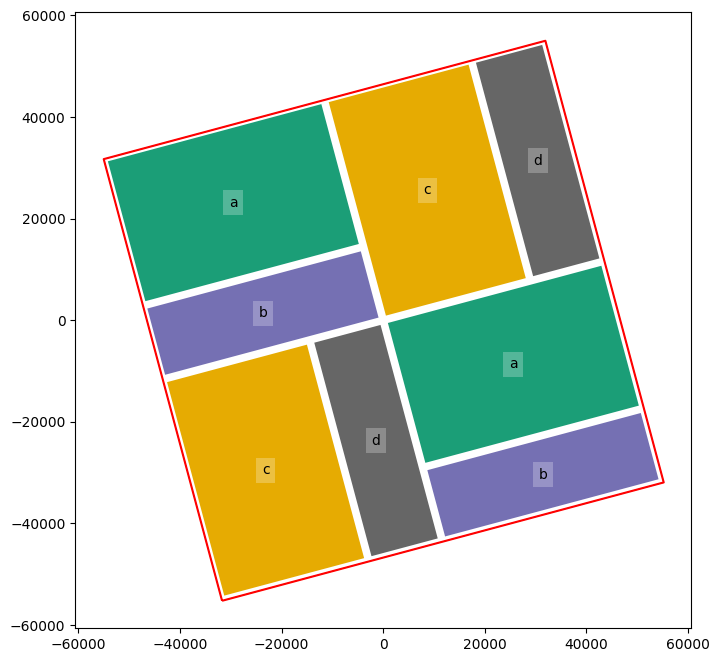

In [5]:
w3.plot(show_ids = True)

In [6]:
tiling = Tiling(w3, us)

In [7]:
election_map = tiling.get_tiled_map()

In [8]:
election_map.vars_to_map = ["Democrat", "Green", "Republican", "Libertarian"]
election_map.colors_to_use = ["Blues", "Greens", "Reds", "Purples"]
election_map.schemes_to_use = "equalinterval"
election_map.n_classes = 5

No tile ids provided: setting all of them!
Setting defaults for the 'categoricals' attribute of the map.


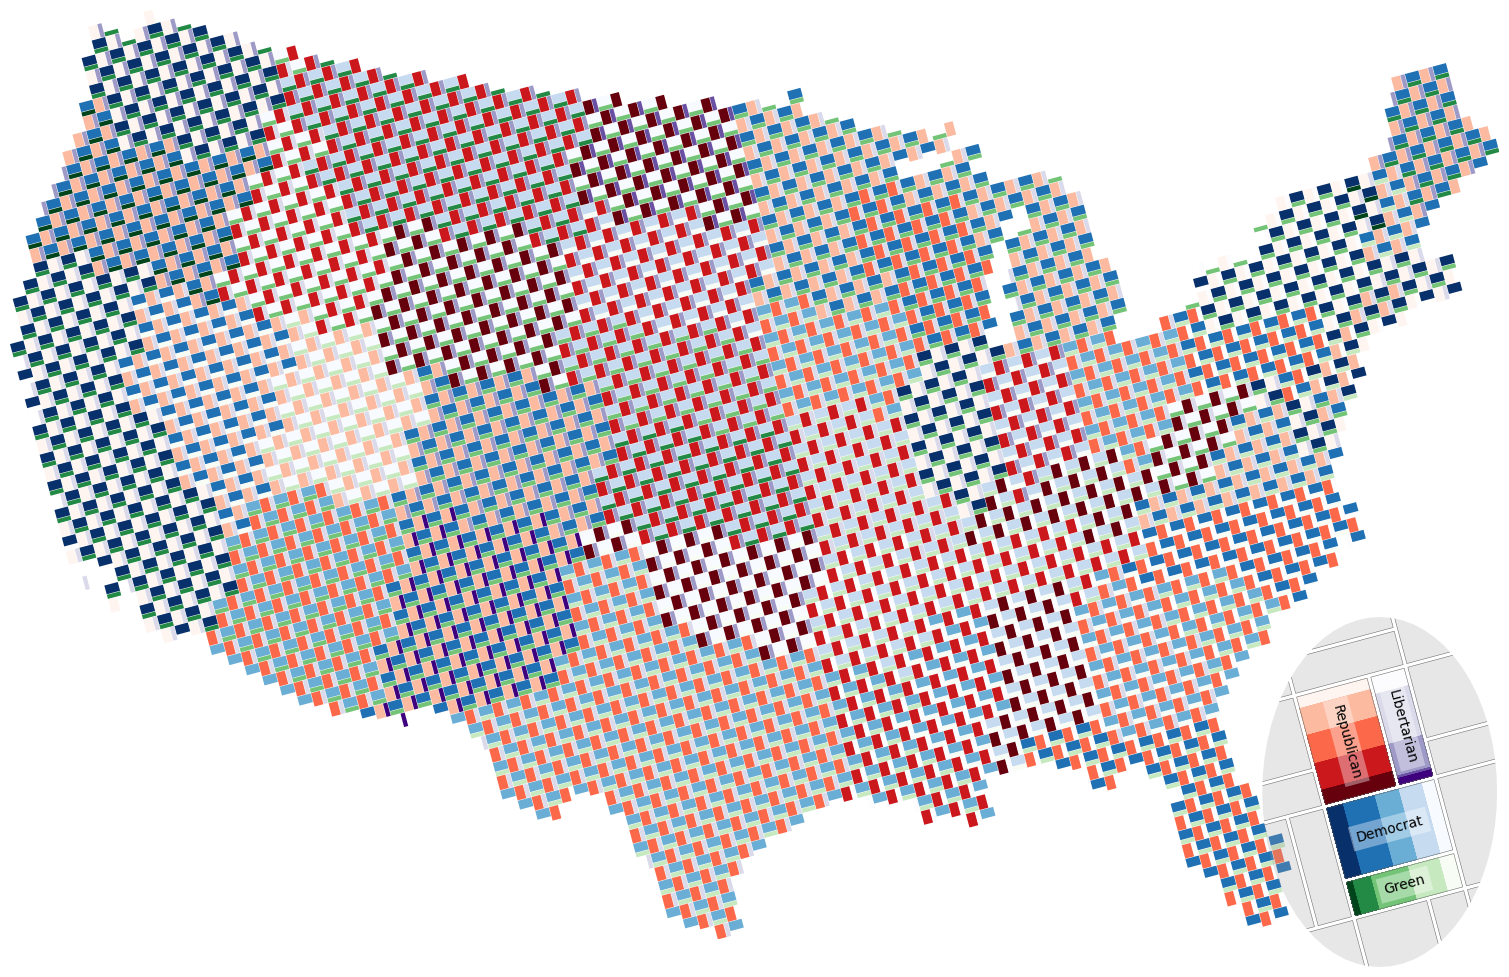

In [9]:
fig = election_map.render(legend = True, dpi = 90, use_ellipse = True,
                          legend_dx = -0.125, legend_dy = -0.475)
# fig.savefig("NZCS-Aug-2022/slides/images/election-2016-weave.png", dpi = 90)

In [10]:
election_map._colourspecs

{'a': {'column': 'Democrat',
  'cmap': 'Blues',
  'categorical': False,
  'scheme': 'equalinterval',
  'k': 5},
 'b': {'column': 'Green',
  'cmap': 'Greens',
  'categorical': False,
  'scheme': 'equalinterval',
  'k': 5},
 'c': {'column': 'Republican',
  'cmap': 'Reds',
  'categorical': False,
  'scheme': 'equalinterval',
  'k': 5},
 'd': {'column': 'Libertarian',
  'cmap': 'Purples',
  'categorical': False,
  'scheme': 'equalinterval',
  'k': 5}}